# Unix Command for Data Scientists

## Declare Filename

In [1]:
!ls ./unix

shakespeare.txt


In [2]:
filename = './unix/shakespeare.txt'
!echo $filename
print(filename)

./unix/shakespeare.txt
./unix/shakespeare.txt


## head

In [3]:
!head -n 3 $filename

## tail

In [5]:
!tail -n 10 $filename

## wc

In [7]:
!wc $filename

 124505  901447 5583442 ./unix/shakespeare.txt


In [9]:
!wc -l $filename

124505 ./unix/shakespeare.txt


## cat

In [8]:
!cat $filename | wc -l

124505


## grep

In [12]:
!grep -i 'parchment' $filename

In [11]:
## matching pattern one per line and counting the number of lines
!cat $filename | grep -o 'liberty' | wc -l

71


## sed

In [15]:
!sed -e 's/parchment/manuscript/g' $filename > temp.txt

In [17]:
!grep -i 'manuscript' temp.txt

## sort

In [18]:
!head -n 5 $filename

In [19]:
!head -n 5 $filename | sort

In [21]:
# column seprated by ' ', sort on column 2 (-k2), Case insenstiive (-f)
!head -n 5 $filename | sort -f -t' ' -k2

## uniq

In [22]:
!sort $filename | wc -l

124505


In [23]:
!uniq $filename | wc -l

121532


# Count most frequent word in the file using Unix

In [49]:
!sed -e 's/ /\n/g' -e 's/\r//g' < $filename | sed '/^$/d' | sort | uniq -c | sort -nr | head -13

  23244 the
  19542 I
  18302 and
  15623 to
  15551 of
  12532 a
  10824 my
   9576 in
   9081 you
   7851 is
   7531 that
   7068 And
   6948 not
sort: write failed: 'standard output': Broken pipe
sort: write error


## Writing output to the file

In [37]:
!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -13 > count_words.txt

sort: write failed: 'standard output': Broken pipe
sort: write error


In [38]:
!cat count_words.txt

 502289 $
  22678 the$
  19163 I$
  17868 and$
  15324 to$
  15216 of$

  12152 a$
  10614 my$
   9347 in$
   8709 you$
   7662 is$
   7332 that$


## Plot by import word_counts into python

In [39]:
%matplotlib inline

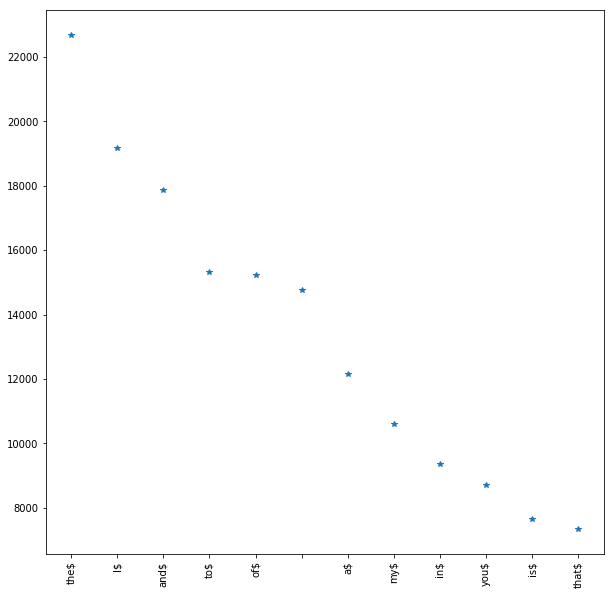

In [46]:
import matplotlib.pyplot as plt
import csv

xTicks = []
y = []

with open('count_words.txt') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))
    
# Remove the spaces from the  first elemnt
xTicks = xTicks[1:]
y = y[1:]
# print(y)
# print(xTicks)
x = range(len(y))
plt.figure(figsize=(10, 10))

plt.xticks(x, xTicks, rotation=90) # rotating the label 90 degrees

plt.plot(x,y,'*')